# <center>Hotel Data Analysis</center>

# Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data

In [2]:
df_bookings = pd.read_csv('datasets/fact_bookings.csv')
df_date = pd.read_csv('datasets/dim_date.csv')
df_hotels = pd.read_csv('datasets/dim_hotels.csv')
df_rooms = pd.read_csv('datasets/dim_rooms.csv')
df_agg_bookings = pd.read_csv('datasets/fact_aggregated_bookings.csv')

# Exploring bookings data

In [3]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [4]:
df_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134590 entries, 0 to 134589
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134590 non-null  object 
 1   property_id        134590 non-null  int64  
 2   booking_date       134590 non-null  object 
 3   check_in_date      134590 non-null  object 
 4   checkout_date      134590 non-null  object 
 5   no_guests          134587 non-null  float64
 6   room_category      134590 non-null  object 
 7   booking_platform   134590 non-null  object 
 8   ratings_given      56683 non-null   float64
 9   booking_status     134590 non-null  object 
 10  revenue_generated  134590 non-null  int64  
 11  revenue_realized   134590 non-null  int64  
dtypes: float64(2), int64(3), object(7)
memory usage: 12.3+ MB


In [5]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


In [6]:
df_bookings.shape

(134590, 12)

In [7]:
df_bookings.columns

Index(['booking_id', 'property_id', 'booking_date', 'check_in_date',
       'checkout_date', 'no_guests', 'room_category', 'booking_platform',
       'ratings_given', 'booking_status', 'revenue_generated',
       'revenue_realized'],
      dtype='object')

In [8]:
df_bookings.booking_status.unique()

array(['Checked Out', 'Cancelled', 'No Show'], dtype=object)

<AxesSubplot:title={'center':'Booking Status Distribution'}>

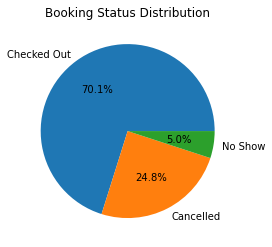

In [9]:
df_bookings.booking_status.value_counts().plot(kind='pie', autopct='%1.1f%%' , title="Booking Status Distribution", ylabel='')

In [10]:
df_bookings.booking_platform.value_counts().sort_values(ascending=False)

others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: booking_platform, dtype: int64

<AxesSubplot:title={'center':'Booking Platform Distribution'}>

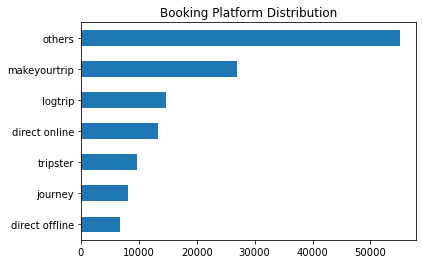

In [11]:
df_bookings.booking_platform.value_counts().sort_values().plot(kind='barh', title="Booking Platform Distribution")

In [12]:
df_bookings.ratings_given.value_counts().sort_values()

1.0     3537
2.0     6452
4.0     9653
3.0    17561
5.0    19480
Name: ratings_given, dtype: int64

In [13]:
df_bookings['revenue_generated'] - df_bookings['revenue_realized']

0               0
1            5460
2         9090900
3            5460
4               0
           ...   
134585          0
134586          0
134587      19380
134588          0
134589      19380
Length: 134590, dtype: int64

# Exploring date data 

In [14]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [15]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [16]:
df_date.describe()

,date,mmm yy,week no,day_type
count,92,92,92,92
unique,92,3,14,2
top,01-May-22,May 22,W 19,weekeday
freq,1,31,7,65


In [17]:
df_date.shape

(92, 4)

In [18]:
df_date.columns

Index(['date', 'mmm yy', 'week no', 'day_type'], dtype='object')

# Exploring hotels data 

In [19]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [20]:
df_hotels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   property_id    25 non-null     int64 
 1   property_name  25 non-null     object
 2   category       25 non-null     object
 3   city           25 non-null     object
dtypes: int64(1), object(3)
memory usage: 928.0+ bytes


In [21]:
df_hotels.describe()

,property_id
count,25.000000
mean,18040.640000
std,1122.436371
min,16558.000000
25%,17558.000000
50%,17564.000000
75%,18563.000000
max,19563.000000


In [22]:
df_hotels.shape

(25, 4)

In [23]:
df_hotels.columns

Index(['property_id', 'property_name', 'category', 'city'], dtype='object')

In [24]:
df_hotels.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

<AxesSubplot:title={'center':'Distribution by Property'}>

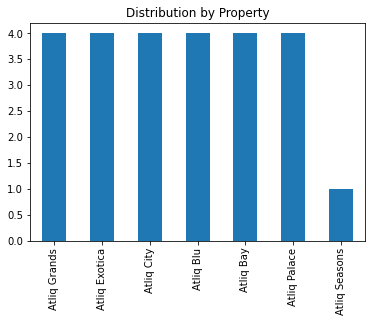

In [25]:
df_hotels.property_name.value_counts().plot(kind='bar', title="Distribution by Property")

In [26]:
df_hotels.city.value_counts()

Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: city, dtype: int64

<AxesSubplot:title={'center':'Distribution of hotel by city'}>

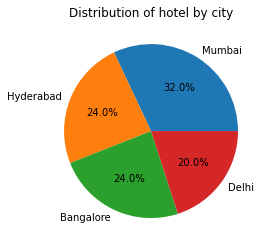

In [27]:
df_hotels.city.value_counts().plot(kind="pie", title="Distribution of hotel by city", ylabel="", autopct = '%1.1f%%')

In [28]:
df_hotels.category.value_counts()

Luxury      16
Business     9
Name: category, dtype: int64

<AxesSubplot:title={'center':'Distribution of hotel by category'}>

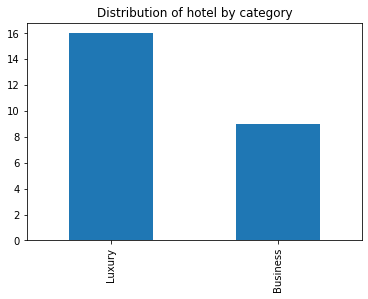

In [29]:
df_hotels.category.value_counts().plot(kind='bar', title = "Distribution of hotel by category")

# Exploring rooms data

In [30]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


In [31]:
df_rooms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   room_id     4 non-null      object
 1   room_class  4 non-null      object
dtypes: object(2)
memory usage: 192.0+ bytes


In [32]:
df_rooms.describe()

,room_id,room_class
count,4,4
unique,4,4
top,RT1,Standard
freq,1,1


In [33]:
df_rooms.shape

(4, 2)

In [34]:
df_rooms.columns

Index(['room_id', 'room_class'], dtype='object')

In [35]:
df_rooms.room_class.value_counts()

Standard        1
Elite           1
Premium         1
Presidential    1
Name: room_class, dtype: int64

# Exploring aggregated booking data

In [36]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [37]:
df_agg_bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9200 entries, 0 to 9199
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_id          9200 non-null   int64  
 1   check_in_date        9200 non-null   object 
 2   room_category        9200 non-null   object 
 3   successful_bookings  9200 non-null   int64  
 4   capacity             9198 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 359.5+ KB


In [38]:
df_agg_bookings.describe()

,property_id,successful_bookings,capacity
count,9200.000000,9200.000000,9198.000000
mean,18040.640000,14.655761,25.280496
std,1099.818325,7.736170,11.442080
min,16558.000000,1.000000,3.000000
25%,17558.000000,9.000000,18.000000
50%,17564.000000,14.000000,25.000000
75%,18563.000000,19.000000,34.000000
max,19563.000000,123.000000,50.000000


In [39]:
df_agg_bookings.shape

(9200, 5)

In [40]:
df_agg_bookings.columns

Index(['property_id', 'check_in_date', 'room_category', 'successful_bookings',
       'capacity'],
      dtype='object')

In [41]:
df_agg_bookings.property_id.unique()

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [42]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7211
17558    5053
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4737
19558    4400
19559    4729
19560    6079
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

<AxesSubplot:xlabel='property_id'>

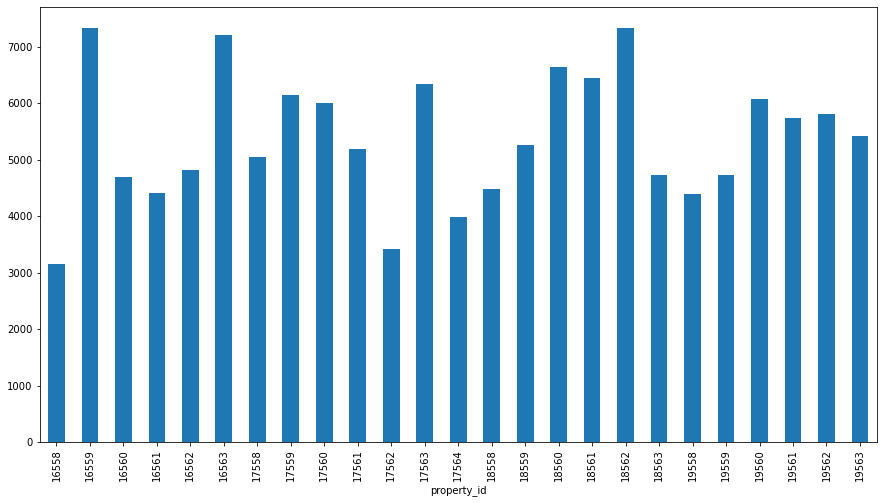

In [43]:
df_agg_bookings.groupby('property_id')['successful_bookings'].sum().plot(kind="bar", figsize=(15, 8))

In [44]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [45]:
df_agg_bookings.capacity.max()

50.0

In [46]:
df_agg_bookings[df_agg_bookings.capacity==df_agg_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,1-May-22,RT2,38,50.0
128,17558,2-May-22,RT2,27,50.0
229,17558,3-May-22,RT2,26,50.0
328,17558,4-May-22,RT2,27,50.0
428,17558,5-May-22,RT2,29,50.0
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50.0
8828,17558,28-Jul-22,RT2,21,50.0
8928,17558,29-Jul-22,RT2,23,50.0
9028,17558,30-Jul-22,RT2,32,50.0


# Data Cleaning

In [47]:
df_bookings.describe()

,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134587.000000,56683.000000,1.345900e+05,134590.000000
mean,18061.113493,2.036170,3.619004,1.537805e+04,12696.123256
std,1093.055847,1.034885,1.235009,9.303604e+04,6928.108124
min,16558.000000,-17.000000,1.000000,6.500000e+03,2600.000000
25%,17558.000000,1.000000,3.000000,9.900000e+03,7600.000000
50%,17564.000000,2.000000,4.000000,1.350000e+04,11700.000000
75%,18563.000000,2.000000,5.000000,1.800000e+04,15300.000000
max,19563.000000,6.000000,5.000000,2.856000e+07,45220.000000


**1. Clean Invalid Guests**

In [48]:
df_bookings[df_bookings.no_guests<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
17924,May122218559RT44,18559,12/5/2022,12/5/2022,14-05-22,-10.0,RT4,direct online,NaN,No Show,20900,20900
18020,May122218561RT22,18561,8/5/2022,12/5/2022,14-05-22,-12.0,RT2,makeyourtrip,NaN,Cancelled,9000,3600
18119,May122218562RT311,18562,5/5/2022,12/5/2022,17-05-22,-6.0,RT3,direct offline,5.0,Checked Out,16800,16800
18121,May122218562RT313,18562,10/5/2022,12/5/2022,17-05-22,-4.0,RT3,direct online,NaN,Cancelled,14400,5760
56715,Jun082218562RT12,18562,5/6/2022,8/6/2022,13-06-22,-17.0,RT1,others,NaN,Checked Out,6500,6500
119765,Jul202219560RT220,19560,19-07-22,20-07-22,22-07-22,-1.0,RT2,others,NaN,Checked Out,13500,13500
134586,Jul312217564RT47,17564,30-07-22,31-07-22,1/8/2022,-4.0,RT4,logtrip,2.0,Checked Out,38760,38760


*As you can see above, number of guests having less than zero value represents data error. We can ignore these records.*

In [49]:
df_bookings = df_bookings[df_bookings.no_guests>0]

In [50]:
df_bookings.shape

(134578, 12)

**2. Outlier removal in revenue generated**

In [51]:
df_bookings.revenue_generated.min(), df_bookings.revenue_generated.max()

(6500, 28560000)

In [52]:
avg, std = df_bookings.revenue_generated.mean(), df_bookings.revenue_generated.std()

In [53]:
avg, std

(15378.036937686695, 93040.15493143328)

In [54]:
higher_limit = avg + 3*std
higher_limit

294498.50173198653

In [55]:
lower_limit = avg - 3*std
lower_limit

-263742.4278566132

In [56]:
df_bookings[df_bookings.revenue_generated<=0]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized


In [57]:
df_bookings[df_bookings.revenue_generated>higher_limit]

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
111,May012216559RT32,16559,29-04-22,1/5/2022,2/5/2022,6.0,RT3,direct online,NaN,Checked Out,28560000,28560
315,May012216562RT22,16562,28-04-22,1/5/2022,4/5/2022,2.0,RT2,direct offline,3.0,Checked Out,12600000,12600
562,May012217559RT118,17559,26-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,2000000,4420
129176,Jul282216562RT26,16562,21-07-22,28-07-22,29-07-22,2.0,RT2,direct online,3.0,Checked Out,10000000,12600


In [58]:
df_bookings = df_bookings[df_bookings.revenue_generated<higher_limit]
df_bookings.shape

(134573, 12)

In [59]:
df_bookings.revenue_realized.describe()

count    134573.000000
mean      12695.983585
std        6927.791692
min        2600.000000
25%        7600.000000
50%       11700.000000
75%       15300.000000
max       45220.000000
Name: revenue_realized, dtype: float64

In [60]:
df_bookings.isnull().sum()

booking_id               0
property_id              0
booking_date             0
check_in_date            0
checkout_date            0
no_guests                0
room_category            0
booking_platform         0
ratings_given        77897
booking_status           0
revenue_generated        0
revenue_realized         0
dtype: int64

*Total values in our dataframe is 134576. Out of that 77899 rows has null rating. Since there are many rows with null rating, we should not filter these values. Also we should not replace this rating with a median or mean rating etc.*

**Finding columns that have null values. Filling these null values with appropriate subtitute (possible ways is to use mean or median)**

In [61]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               2
dtype: int64

In [62]:
df_agg_bookings.capacity.describe().round()

count    9198.0
mean       25.0
std        11.0
min         3.0
25%        18.0
50%        25.0
75%        34.0
max        50.0
Name: capacity, dtype: float64

In [63]:
df_agg_bookings.capacity.median()

25.0

In [64]:
df_agg_bookings.capacity.fillna(df_agg_bookings.capacity.median(), inplace=True)

In [65]:
df_agg_bookings.isnull().sum()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

**Finding out records that have successful_bookings value greater than capacity.**

In [66]:
df_agg_bookings[df_agg_bookings.successful_bookings>df_agg_bookings.capacity]

,property_id,check_in_date,room_category,successful_bookings,capacity
3,17558,1-May-22,RT1,30,19.0
12,16563,1-May-22,RT1,100,41.0
4136,19558,11-Jun-22,RT2,50,39.0
6209,19560,2-Jul-22,RT1,123,26.0
8522,19559,25-Jul-22,RT1,35,24.0
9194,18563,31-Jul-22,RT4,20,18.0


In [67]:
df_agg_bookings.shape

(9200, 5)

In [68]:
df_agg_bookings = df_agg_bookings[df_agg_bookings.successful_bookings<=df_agg_bookings.capacity]
df_agg_bookings.shape

(9194, 5)

# Data Transformation

In [69]:
df_agg_bookings.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0


In [70]:
df_agg_bookings["occ_pct"] = df_agg_bookings["successful_bookings"]/df_agg_bookings["capacity"]
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,0.833333
1,19562,1-May-22,RT1,28,30.0,0.933333
2,19563,1-May-22,RT1,23,30.0,0.766667
4,16558,1-May-22,RT1,18,19.0,0.947368
5,17560,1-May-22,RT1,28,40.0,0.700000


In [71]:
df_agg_bookings["occ_pct"] = df_agg_bookings["occ_pct"].apply(lambda x: round(x*100,2))
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct
0,16559,1-May-22,RT1,25,30.0,83.33
1,19562,1-May-22,RT1,28,30.0,93.33
2,19563,1-May-22,RT1,23,30.0,76.67
4,16558,1-May-22,RT1,18,19.0,94.74
5,17560,1-May-22,RT1,28,40.0,70.00


In [72]:
df_agg_bookings.groupby("room_category")["occ_pct"].mean()

room_category
RT1    57.889643
RT2    58.009756
RT3    58.028213
RT4    59.277925
Name: occ_pct, dtype: float64

*I don't understand RT1, RT2 etc. Print room categories such as Standard, Premium, Elite etc along with average occupancy percentage*

In [73]:
df = pd.merge(df_agg_bookings, df_rooms, left_on ="room_category", right_on="room_id")

In [74]:
df.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_id,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,RT1,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,RT1,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,RT1,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,RT1,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,RT1,Standard


In [75]:
df.groupby("room_class")["occ_pct"].mean().round(2)

room_class
Elite           58.01
Premium         58.03
Presidential    59.28
Standard        57.89
Name: occ_pct, dtype: float64

In [76]:
df.drop("room_id", axis=1, inplace=True)

In [77]:
df.head(5)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class
0,16559,1-May-22,RT1,25,30.0,83.33,Standard
1,19562,1-May-22,RT1,28,30.0,93.33,Standard
2,19563,1-May-22,RT1,23,30.0,76.67,Standard
3,16558,1-May-22,RT1,18,19.0,94.74,Standard
4,17560,1-May-22,RT1,28,40.0,70.00,Standard


*Print Average accupancy rate per city*

In [78]:
df = pd.merge(df, df_hotels, on="property_id")
df.head(2)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city
0,16559,1-May-22,RT1,25,30.0,83.33,Standard,Atliq Exotica,Luxury,Mumbai
1,16559,2-May-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai


<AxesSubplot:xlabel='city'>

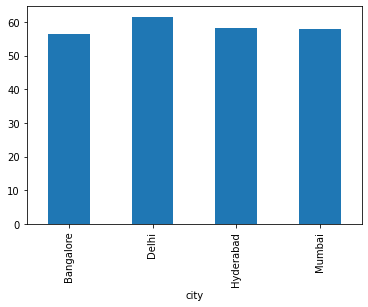

In [80]:
df.groupby("city")["occ_pct"].mean().plot(kind="bar")

**When was the occupancy better? Weekday or Weekend**

In [81]:
df = pd.merge(df, df_date, left_on="check_in_date", right_on="date")
df.head(3)

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
0,16559,10-May-22,RT1,18,30.0,60.00,Standard,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
1,16559,10-May-22,RT2,25,41.0,60.98,Elite,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday
2,16559,10-May-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-May-22,May 22,W 20,weekeday


In [83]:
df.groupby("day_type")["occ_pct"].mean().round(2)

day_type
weekeday    50.88
weekend     72.34
Name: occ_pct, dtype: float64

**In the month of June, what is the occupancy for different cities**

In [84]:
df["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [85]:
df_june_22 = df[df["mmm yy"]=="Jun 22"]
df_june_22.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type
2200,16559,10-Jun-22,RT1,20,30.0,66.67,Standard,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2201,16559,10-Jun-22,RT2,26,41.0,63.41,Elite,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2202,16559,10-Jun-22,RT3,20,32.0,62.50,Premium,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2203,16559,10-Jun-22,RT4,11,18.0,61.11,Presidential,Atliq Exotica,Luxury,Mumbai,10-Jun-22,Jun 22,W 24,weekeday
2204,19562,10-Jun-22,RT1,19,30.0,63.33,Standard,Atliq Bay,Luxury,Bangalore,10-Jun-22,Jun 22,W 24,weekeday


In [86]:
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False)

city
Delhi        62.47
Hyderabad    58.46
Mumbai       58.38
Bangalore    56.44
Name: occ_pct, dtype: float64

<AxesSubplot:xlabel='city'>

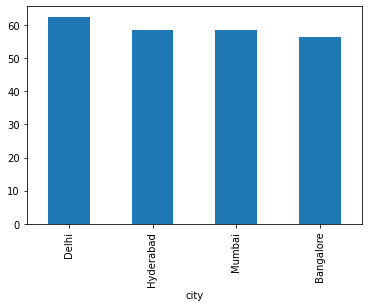

In [87]:
df_june_22.groupby("city")["occ_pct"].mean().round(2).sort_values(ascending=False).plot(kind="bar")

In [88]:
df_august = pd.read_csv('datasets/new_data_august.csv')

In [89]:
df_august.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [90]:
df_august.columns

Index(['property_id', 'property_name', 'category', 'city', 'room_category',
       'room_class', 'check_in_date', 'mmm yy', 'week no', 'day_type',
       'successful_bookings', 'capacity', 'occ%'],
      dtype='object')

In [92]:
df_august.shape

(7, 13)

In [94]:
latest_df = pd.concat([df, df_august], ignore_index=True, axis=0)
latest_df.tail()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ_pct,room_class,property_name,category,city,date,mmm yy,week no,day_type,occ%
6499,19563,01-Aug-22,RT1,23,30.0,NaN,Standard,Atliq Palace,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.67
6500,19558,01-Aug-22,RT1,30,40.0,NaN,Standard,Atliq Grands,Luxury,Bangalore,NaN,Aug-22,W 32,weekeday,75.00
6501,19560,01-Aug-22,RT1,20,26.0,NaN,Standard,Atliq City,Business,Bangalore,NaN,Aug-22,W 32,weekeday,76.92
6502,17561,01-Aug-22,RT1,18,26.0,NaN,Standard,Atliq Blu,Luxury,Mumbai,NaN,Aug-22,W 32,weekeday,69.23
6503,17564,01-Aug-22,RT1,10,16.0,NaN,Standard,Atliq Seasons,Business,Mumbai,NaN,Aug-22,W 32,weekeday,62.50


In [95]:
latest_df.shape

(6504, 15)

**Print revenue realized per city**

In [96]:
df_hotels.head(3)

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi


In [97]:
df_bookings.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100


In [98]:
df_bookings_all = pd.merge(df_bookings, df_hotels, on="property_id")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [99]:
df_bookings_all.groupby("city")["revenue_realized"].sum()

city
Bangalore    420383550
Delhi        294404488
Hyderabad    325179310
Mumbai       668569251
Name: revenue_realized, dtype: int64

**Print month by month revenue**

In [100]:
df_date.head(4)

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday


In [101]:
df_date["mmm yy"].unique()

array(['May 22', 'Jun 22', 'Jul 22'], dtype=object)

In [102]:
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,1/5/2022,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi


In [103]:
df_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      92 non-null     object
 1   mmm yy    92 non-null     object
 2   week no   92 non-null     object
 3   day_type  92 non-null     object
dtypes: object(4)
memory usage: 3.0+ KB


In [104]:
df_date["date"] = pd.to_datetime(df_date["date"])
df_date.head(3)

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday


In [105]:
df_bookings_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134573 entries, 0 to 134572
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   booking_id         134573 non-null  object 
 1   property_id        134573 non-null  int64  
 2   booking_date       134573 non-null  object 
 3   check_in_date      134573 non-null  object 
 4   checkout_date      134573 non-null  object 
 5   no_guests          134573 non-null  float64
 6   room_category      134573 non-null  object 
 7   booking_platform   134573 non-null  object 
 8   ratings_given      56676 non-null   float64
 9   booking_status     134573 non-null  object 
 10  revenue_generated  134573 non-null  int64  
 11  revenue_realized   134573 non-null  int64  
 12  property_name      134573 non-null  object 
 13  category           134573 non-null  object 
 14  city               134573 non-null  object 
dtypes: float64(2), int64(3), object(10)
memory usage: 1

In [106]:
df_bookings_all["check_in_date"] = pd.to_datetime(df_bookings_all["check_in_date"])
df_bookings_all.head(4)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city
0,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi
1,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920,Atliq Grands,Luxury,Delhi
2,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100,Atliq Grands,Luxury,Delhi
3,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi


In [107]:
df_bookings_all = pd.merge(df_bookings_all, df_date, left_on="check_in_date", right_on="date")
df_bookings_all.head(3)

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized,property_name,category,city,date,mmm yy,week no,day_type
0,May052216558RT11,16558,15-04-22,2022-05-05,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
1,May052216558RT12,16558,30-04-22,2022-05-05,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday
2,May052216558RT13,16558,1/5/2022,2022-05-05,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010,Atliq Grands,Luxury,Delhi,2022-05-05,May 22,W 19,weekeday


In [108]:
df_bookings_all.groupby("mmm yy")["revenue_realized"].sum()

mmm yy
Jul 22    389940912
Jun 22    377191229
May 22    408375641
Name: revenue_realized, dtype: int64

**Print revenue realized per hotel type**

In [109]:
df_bookings_all.property_name.unique()

array(['Atliq Grands', 'Atliq Exotica', 'Atliq City', 'Atliq Blu',
       'Atliq Bay', 'Atliq Palace', 'Atliq Seasons'], dtype=object)

In [110]:
df_bookings_all.groupby("property_name")["revenue_realized"].sum().round(2).sort_values()

property_name
Atliq Seasons     45920757
Atliq Grands     145860641
Atliq Blu        179203544
Atliq Bay        179416721
Atliq City       196555383
Atliq Palace     209474575
Atliq Exotica    219076161
Name: revenue_realized, dtype: int64

**Print average rating per city**

In [111]:
df_bookings_all.groupby("city")["ratings_given"].mean().round(2)

city
Bangalore    3.40
Delhi        3.78
Hyderabad    3.66
Mumbai       3.64
Name: ratings_given, dtype: float64

<AxesSubplot:>

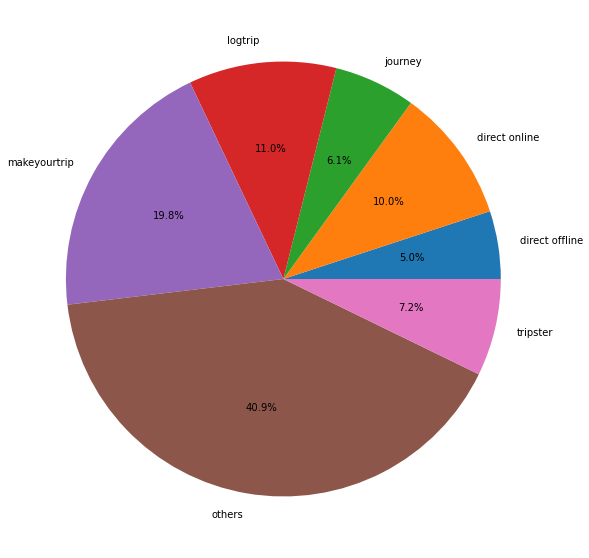

In [119]:
df_bookings_all.groupby("booking_platform")["revenue_realized"].sum().plot(kind="pie", autopct = '%1.1f%%', ylabel='', figsize=(10,10))

# <center>Thank you</center>